In [56]:
import ozzy as oz
import matplotlib.pyplot as plt # noqa
import ozzy.plot as oplot # noqa
import ozzy.fields as flds # noqa
import numpy as np
import xarray as xr
# import seaborn as sns

# sns.set_context('notebook')

In [6]:
# path = "/Volumes/Mariana/Simulations/LCODE/gap_position_scan/from_002400/10m_noramp/xi_Ez_concat.h5"
path = "~/cernbox/Simulations/LCODE/gap_position_scan/from_002400/10m_noramp/xi_Ez_concat.h5"
ds = oz.open('ozzy', path)
ds = ds["xi_Ez"].sel(x1=slice(-200.0, 0.0))

ds_v = oz.open('ozzy', '../vphi_100.h5')


Reading the following files:
    -> 'read' took: 0:00:00.021891

Reading the following files:
    -> 'read' took: 0:00:00.023015


0.9996323529411765
0.00020424836601307117
0.0002626050420168058
105.08218152220232


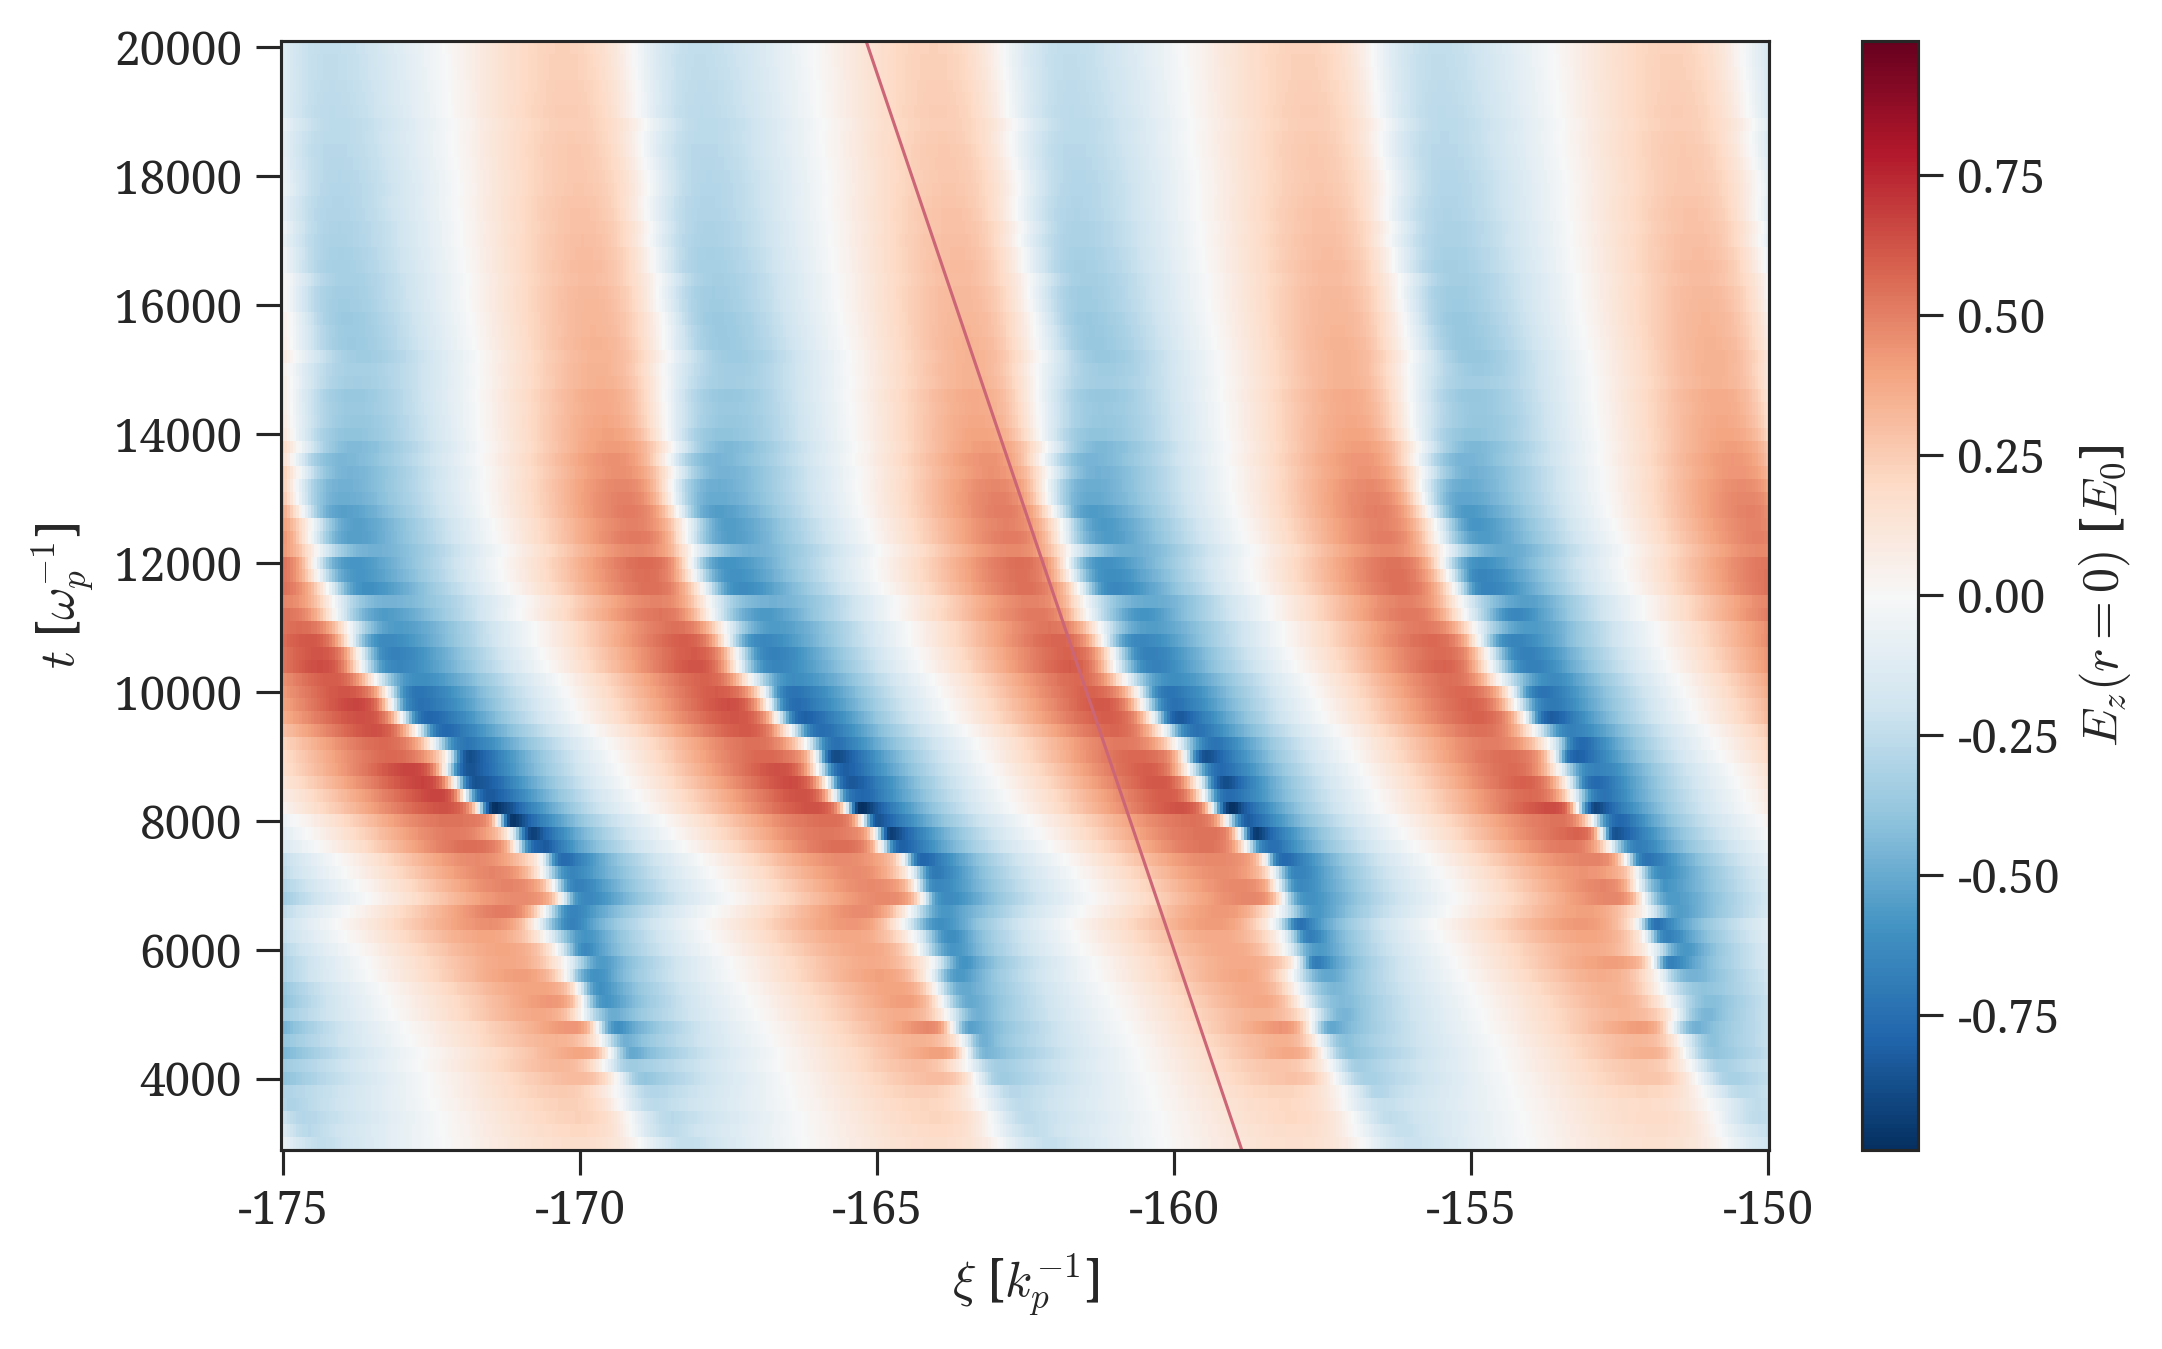

In [48]:
# obj = ds.plot()

ds_sample = ds.sel(x1 = slice(-175,-150), t = slice(3000,20000))
obj = ds_sample.plot()

res = flds.vphi_from_fft(ds_sample, ds_sample.x1.to_numpy(), ds_sample.t.to_numpy())
for item in res:
    print(item)

plt.plot(ds_sample.x1, 1/(res[0]-1)*(ds_sample.x1+160.0) + 6000)
plt.show()
# obj.set_clim(0.975, maxval)

In [19]:
res = flds.vphi_from_fft(ds_sample, ds_sample.x1.to_numpy(), ds_sample.t.to_numpy())
for item in res:
    print(item)

0.9991554054054054
0.00046921921921927456
0.0006032818532818451
70.26372762666075


(-200.0, 0.0)

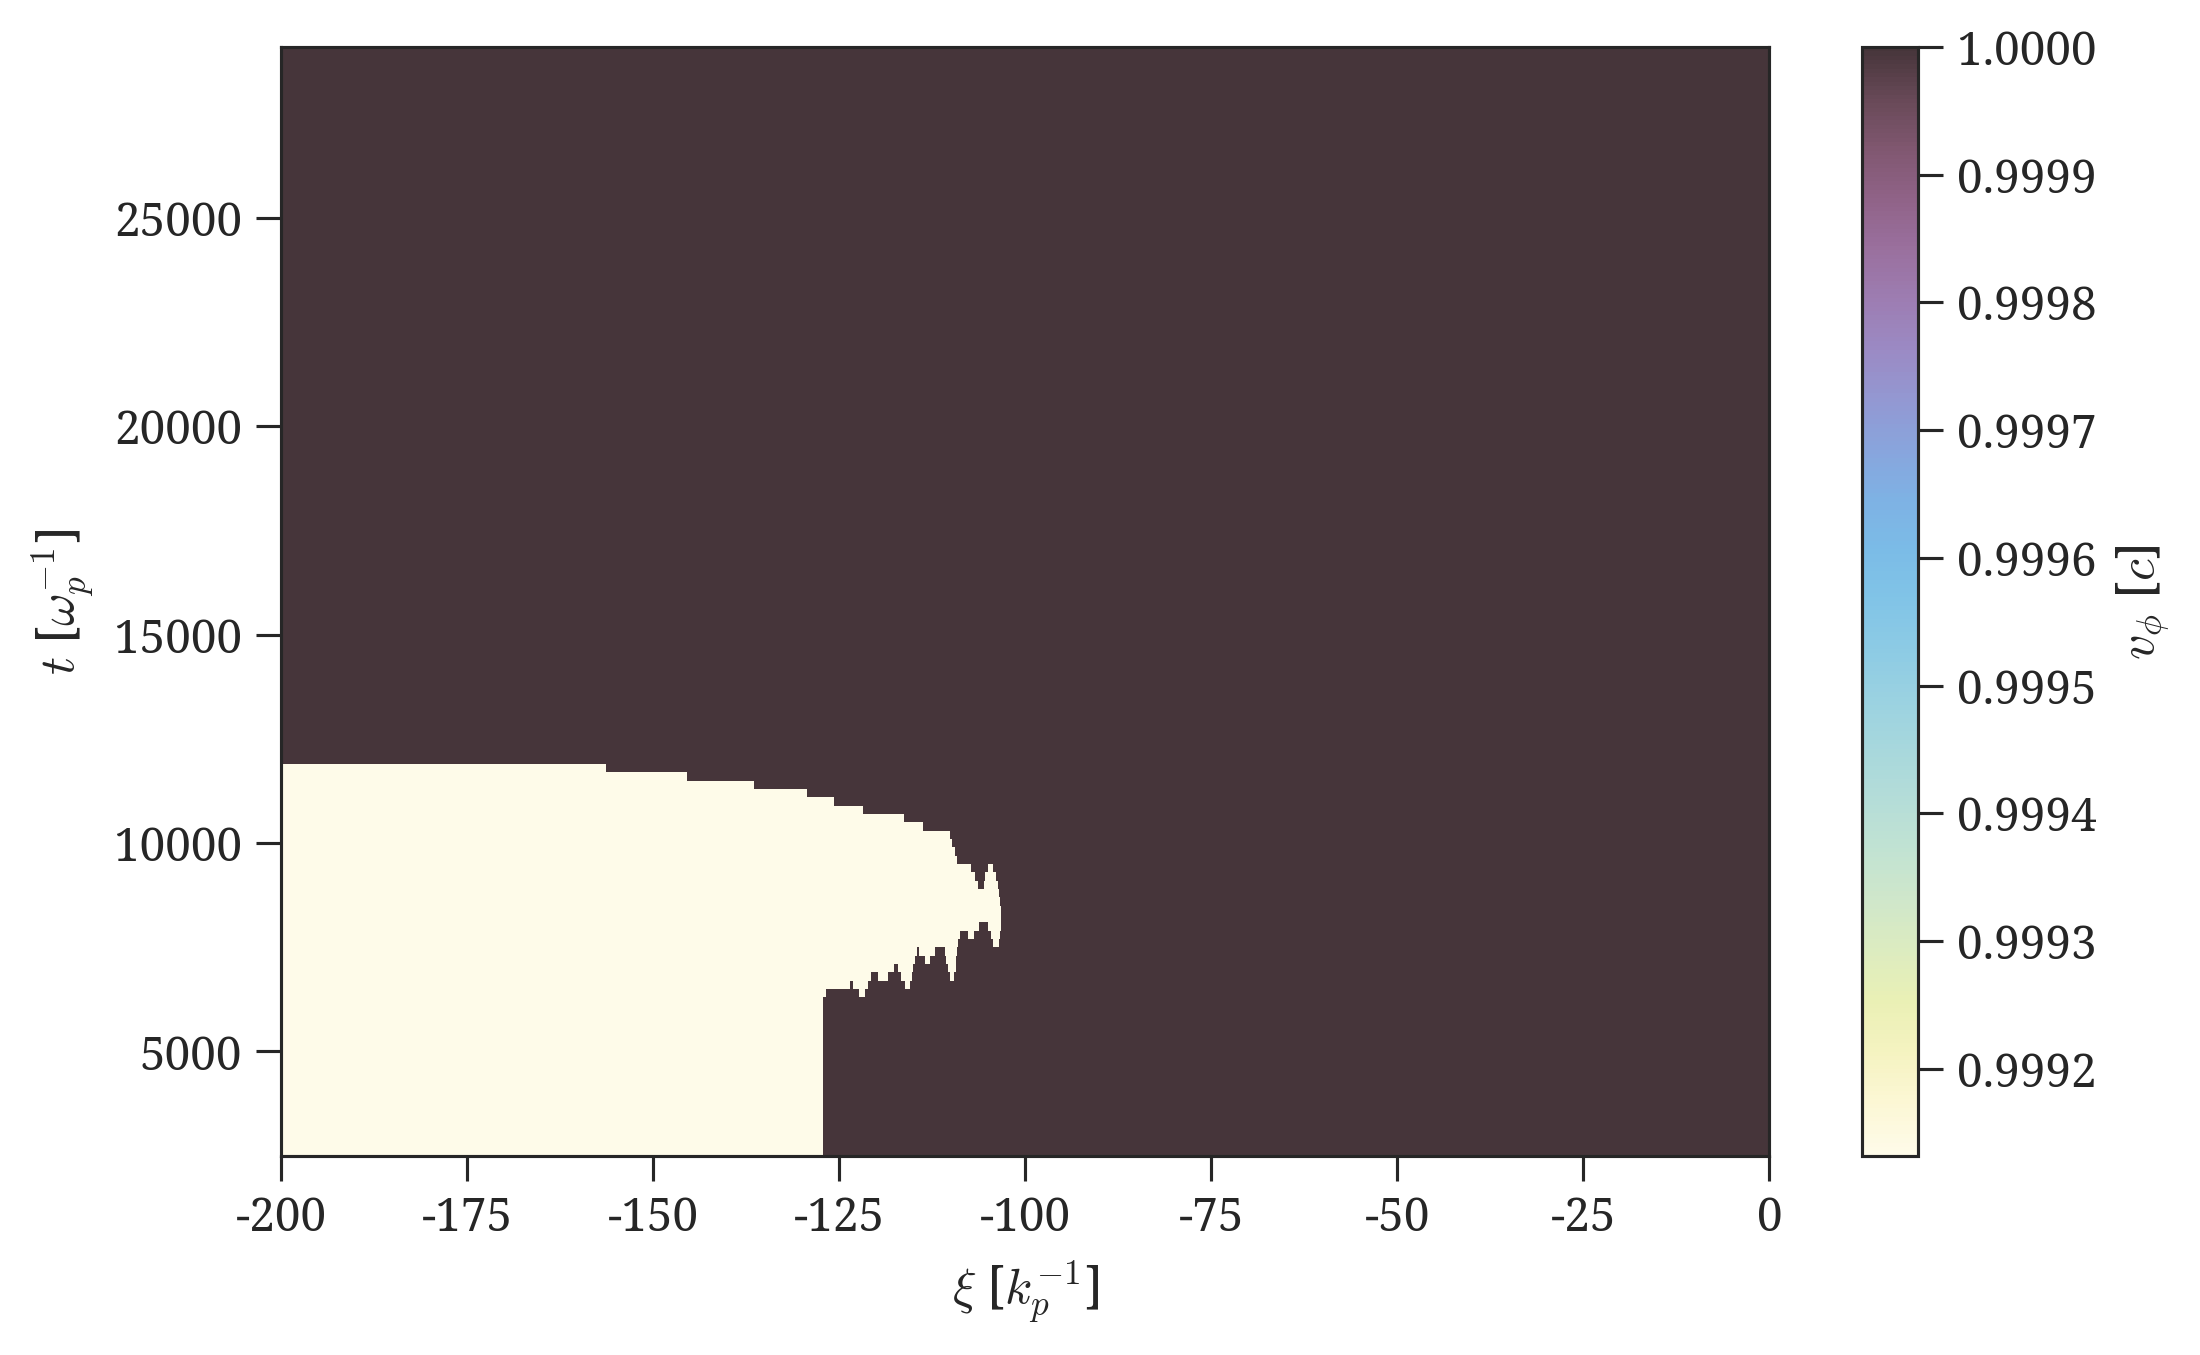

In [13]:
maxval = float(ds_v['vphi'].max().compute())

obj = ds_v['vphi'].plot()
# obj.set_clim(0.9999999, maxval)
plt.xlim((-200,0))

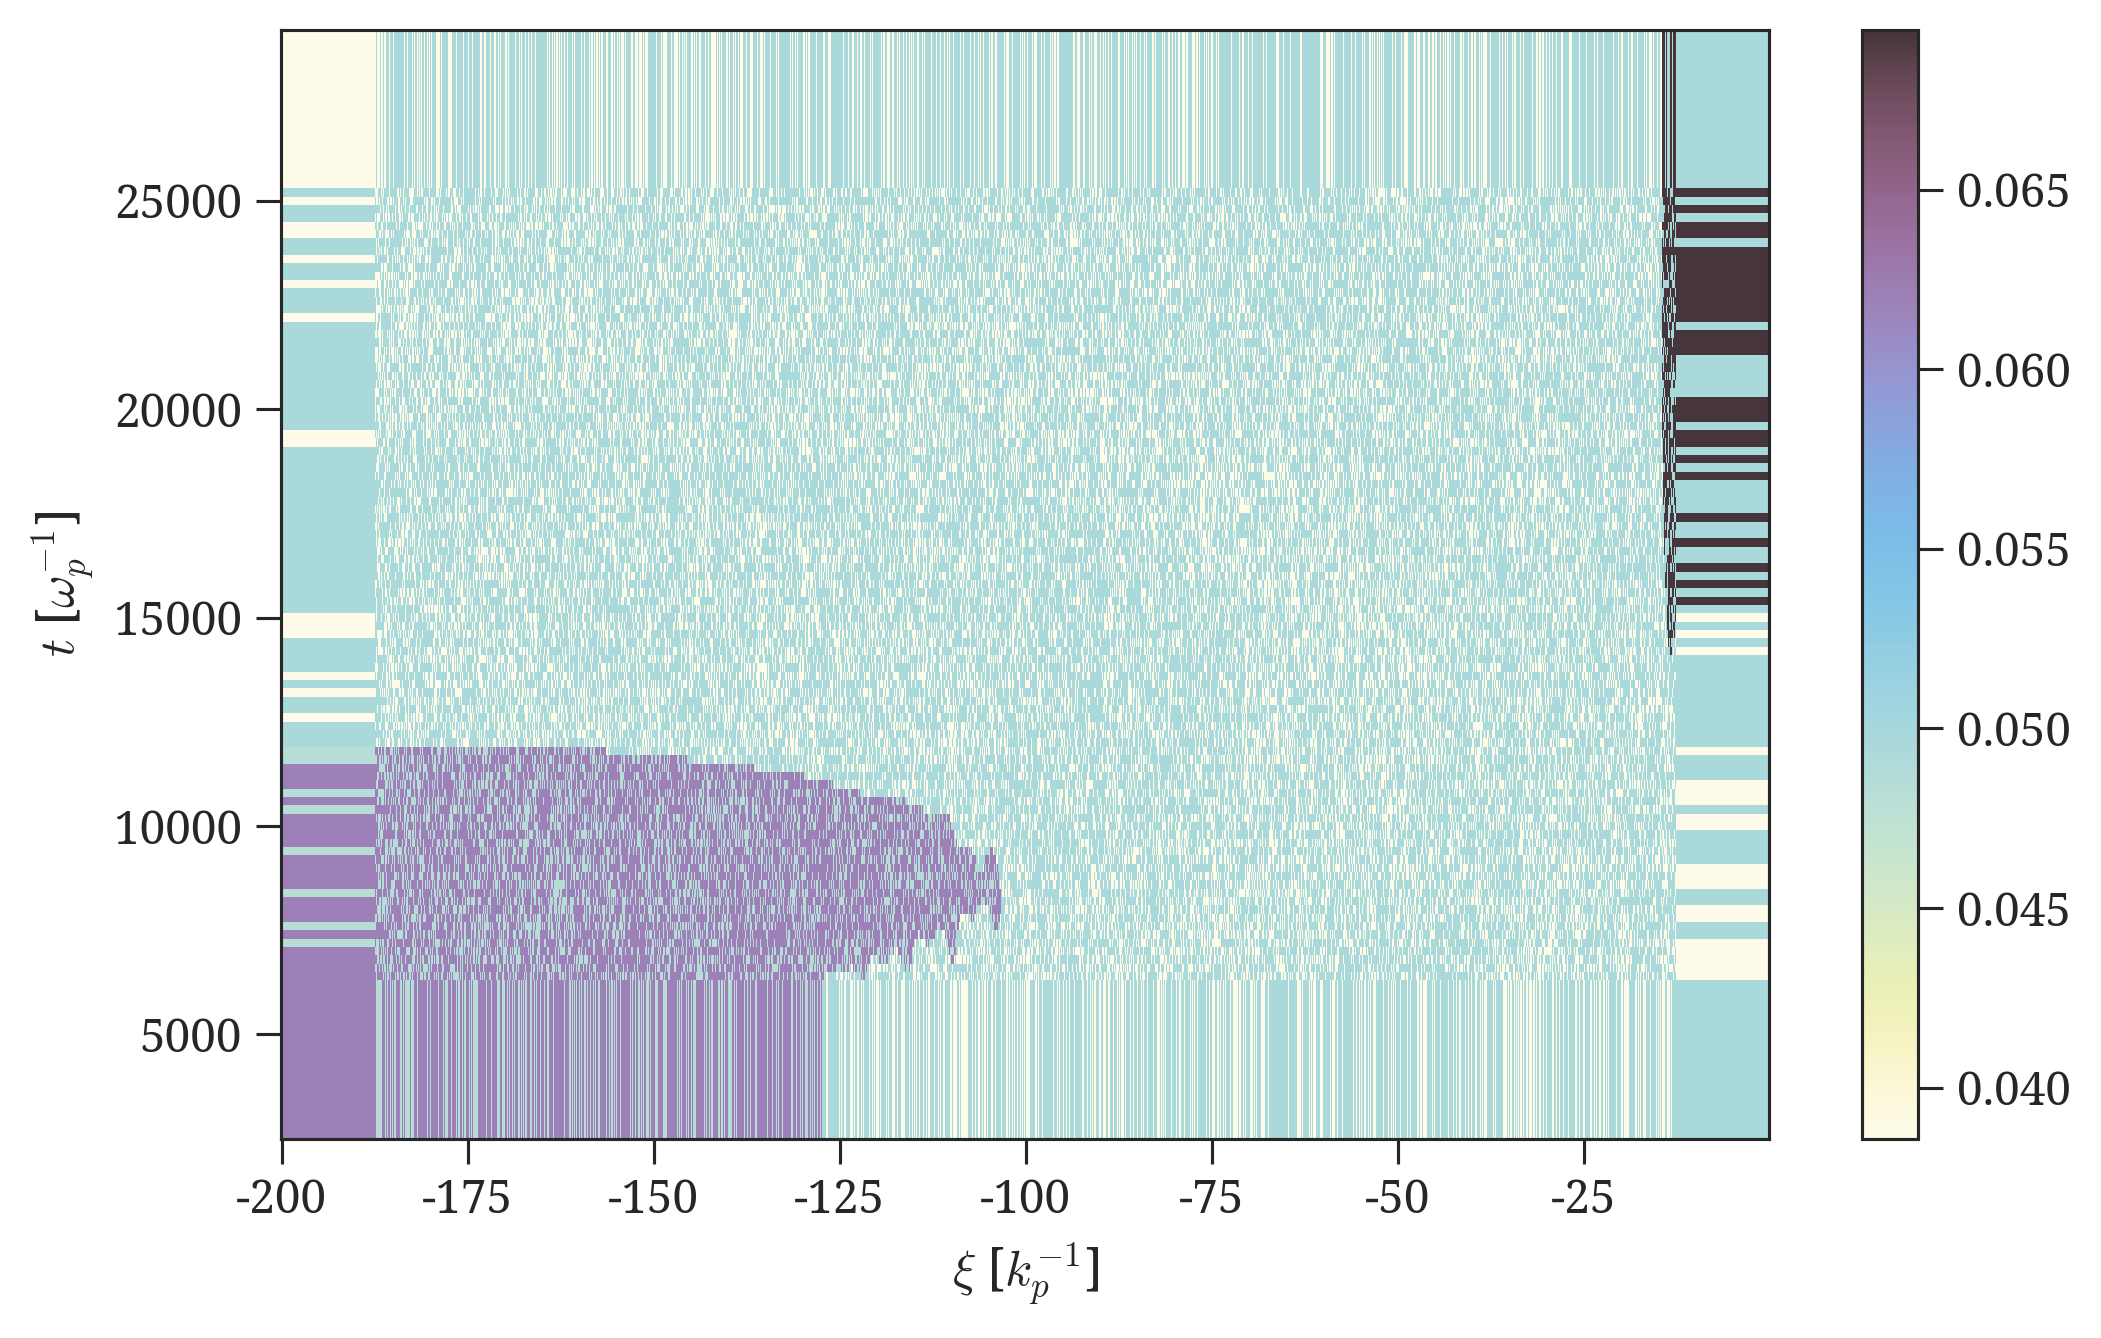

In [9]:
obj = (ds_v['vphi_err_pos']/ds_v['vphi']*100).plot()
# obj.set_clim(0.999, maxval)

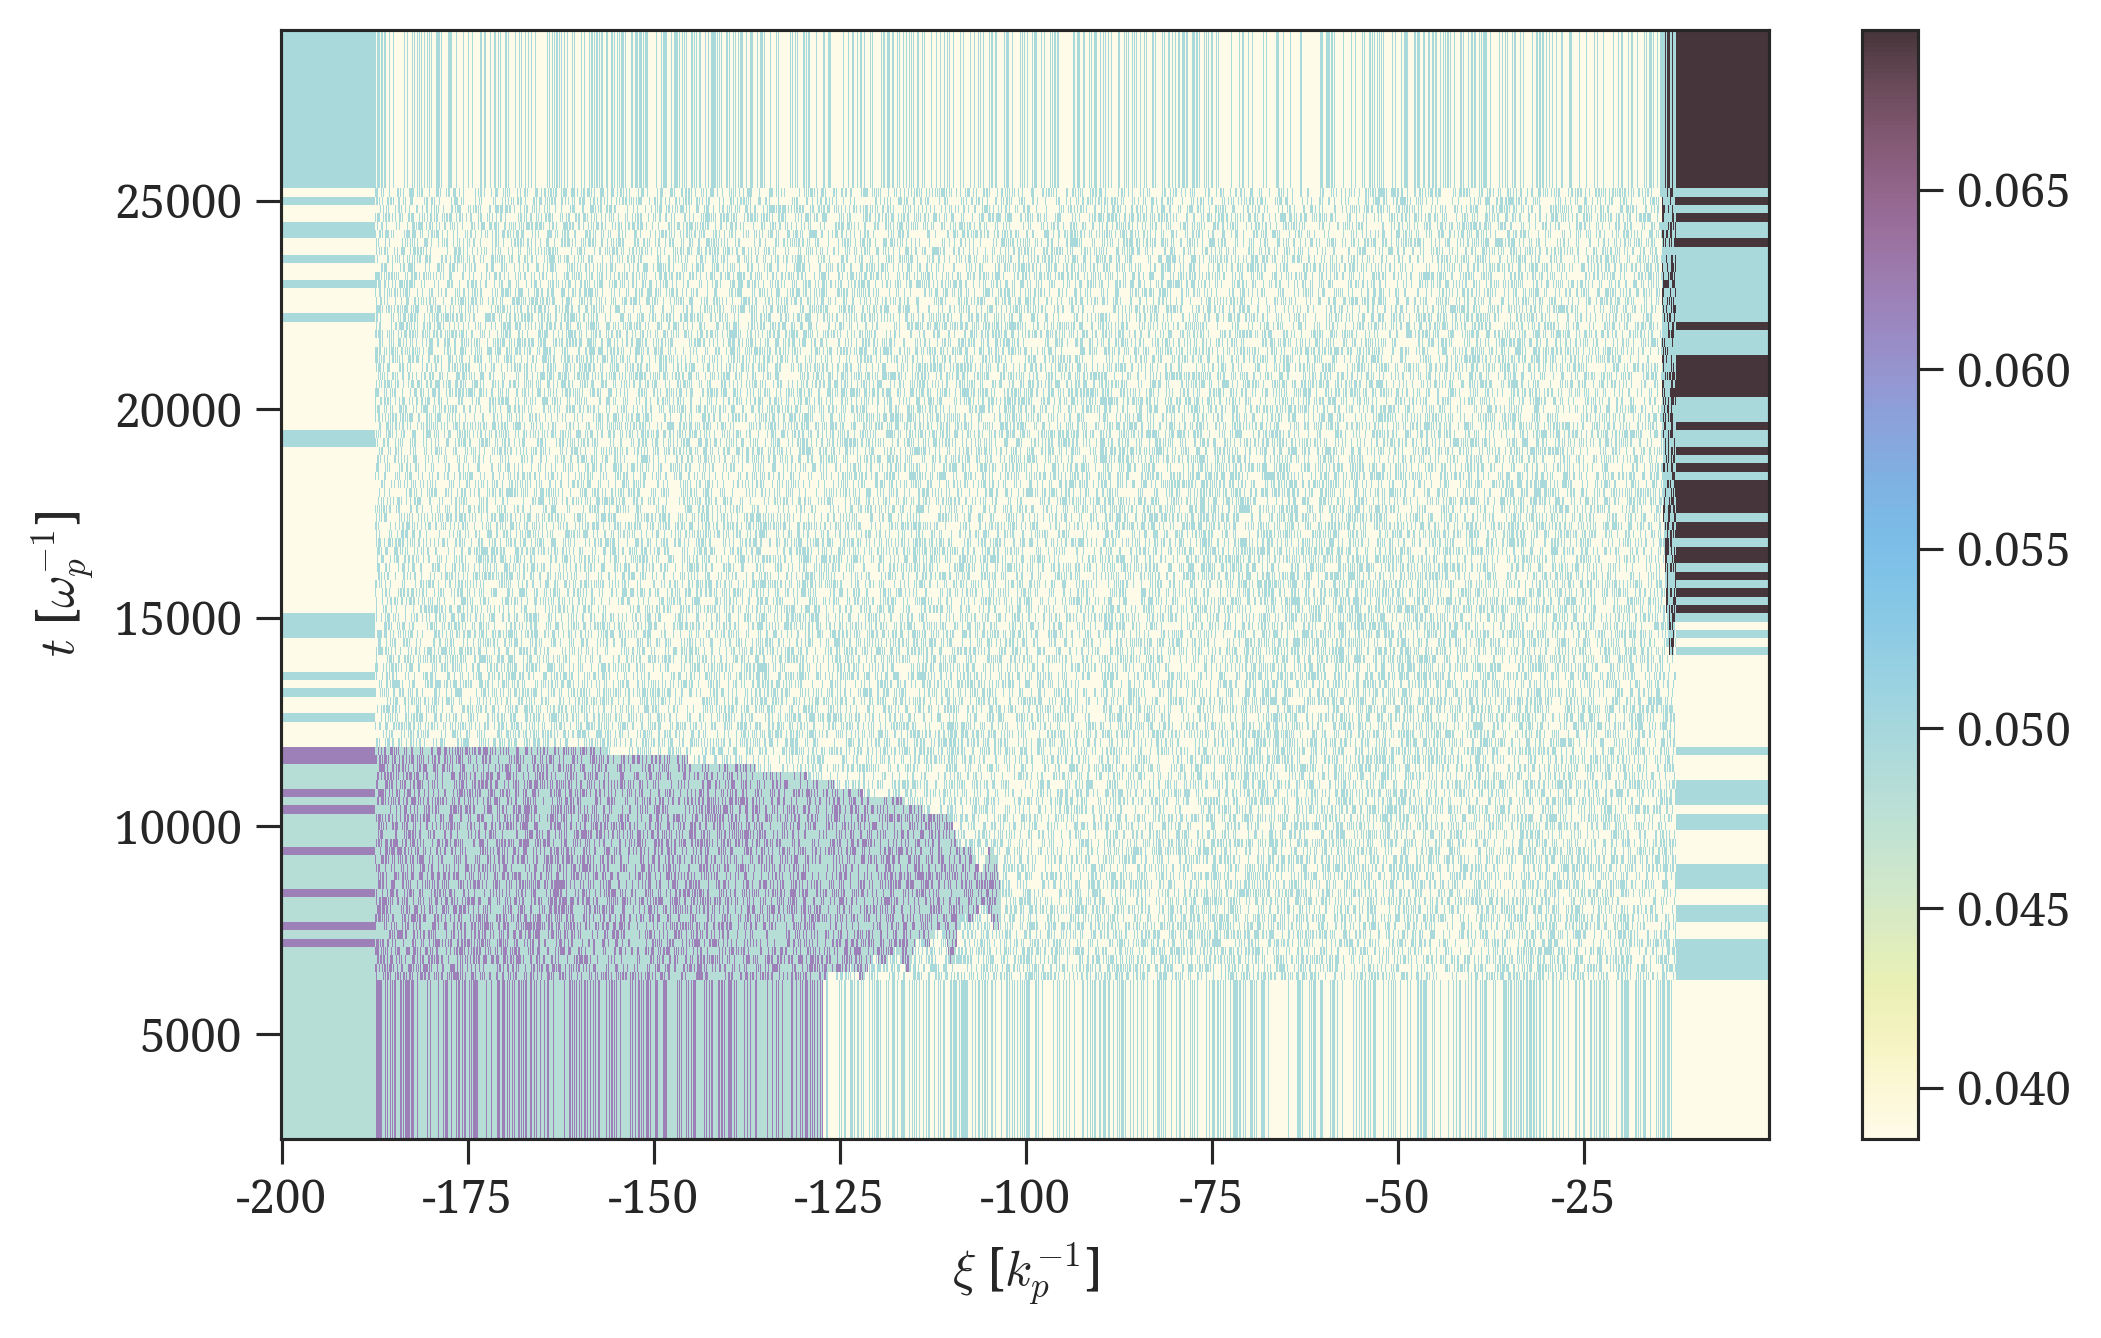

In [10]:
obj = (ds_v['vphi_err_neg']/ds_v['vphi']*100).plot()
# obj.set_clim(0.999, maxval)

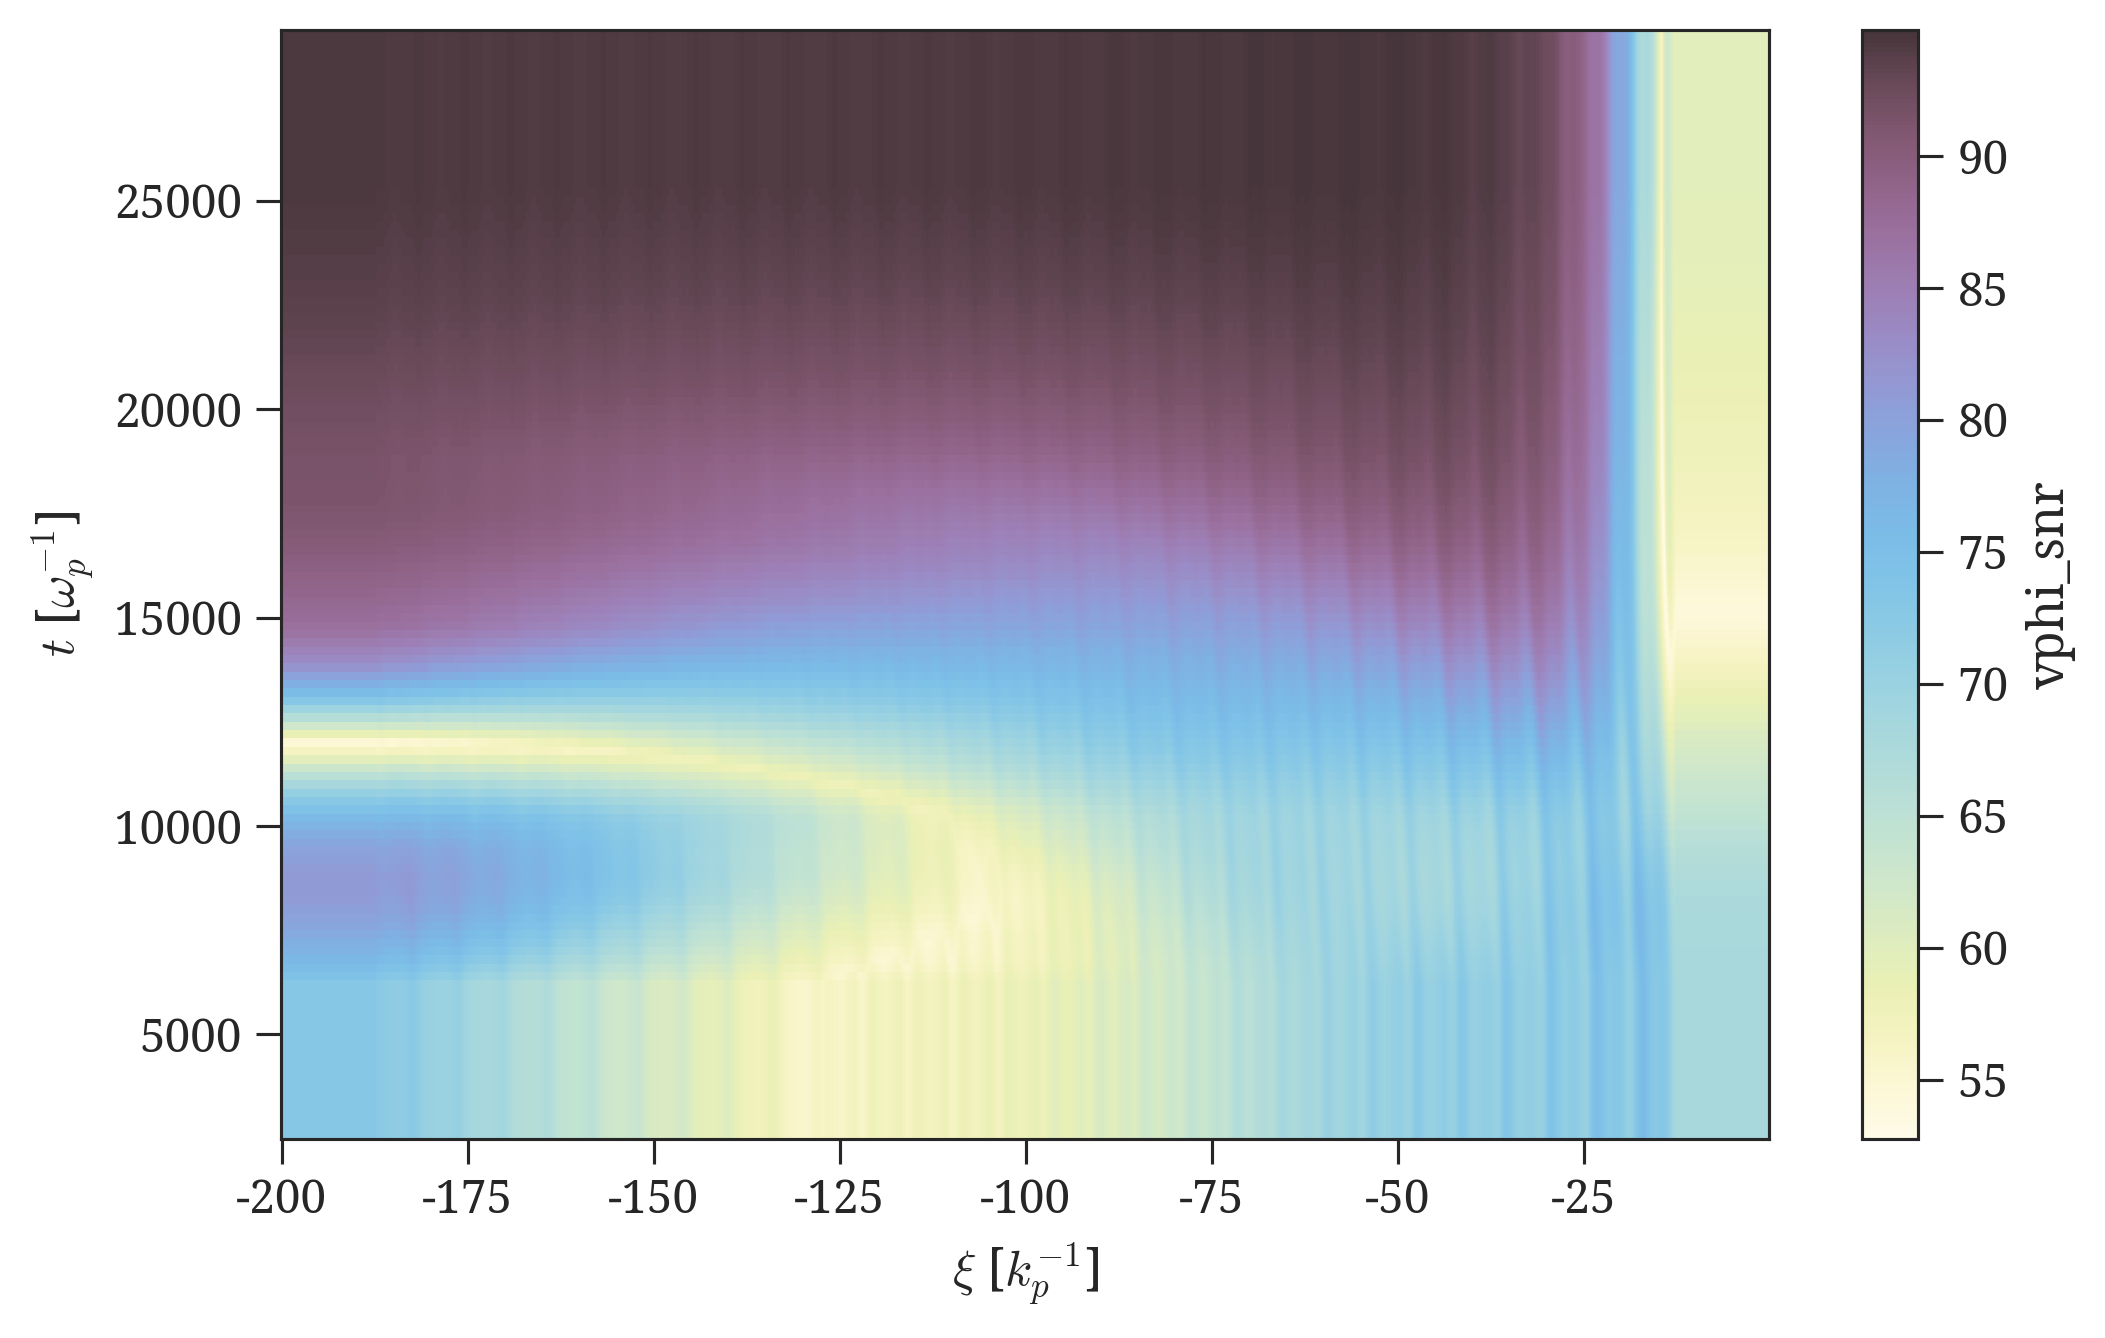

In [11]:
obj = ds_v['vphi_snr'].plot()

## Cross correlation

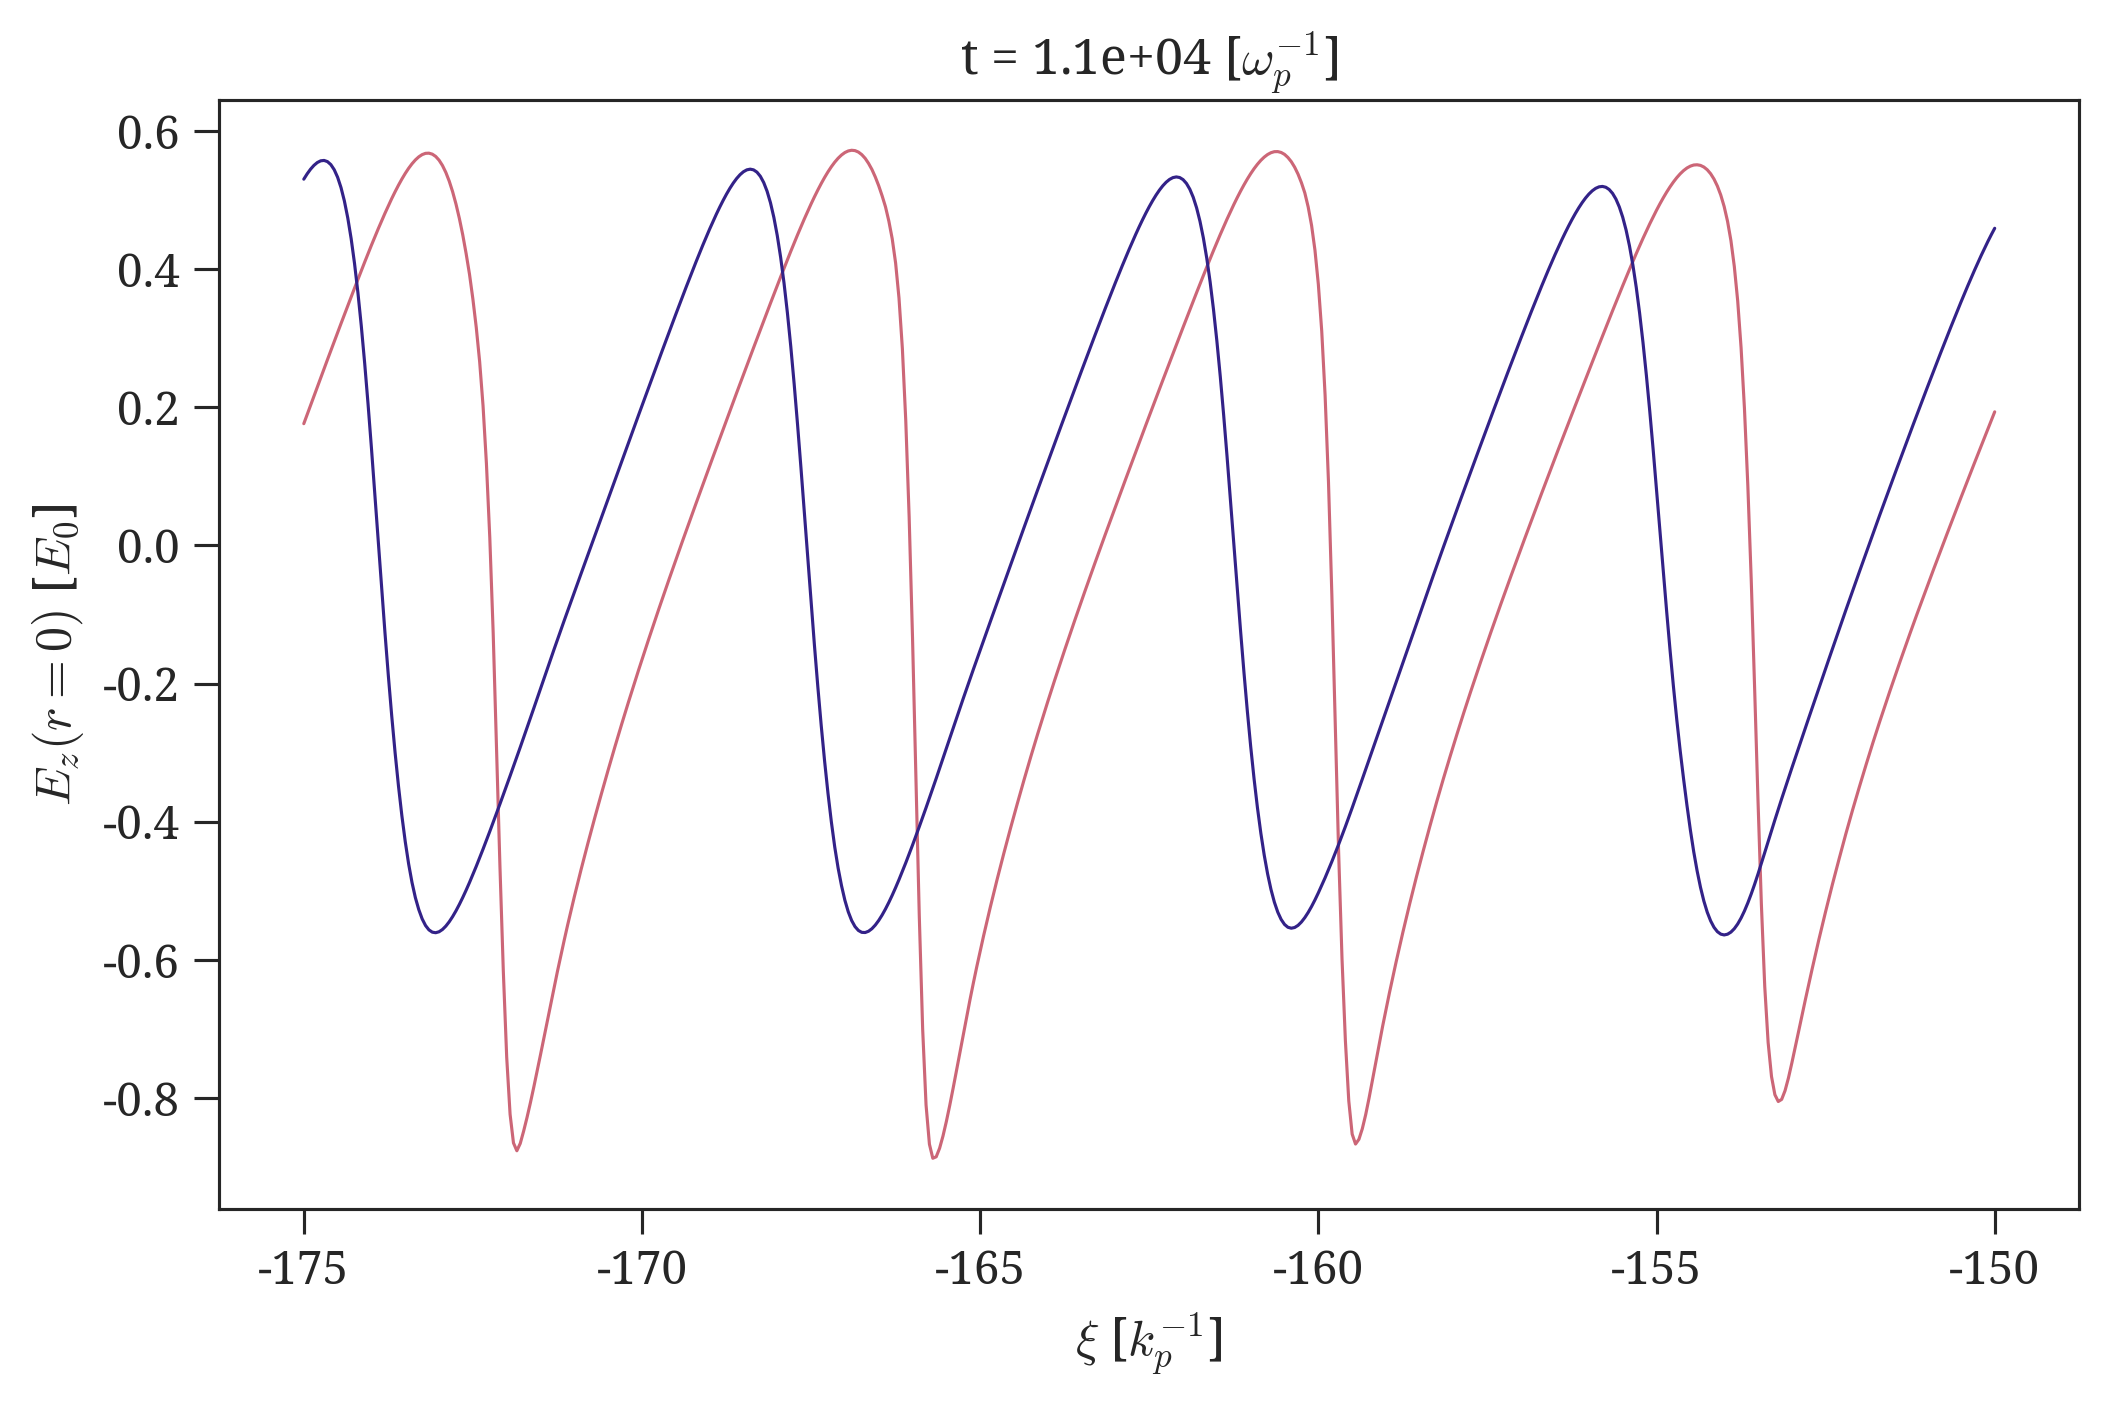

In [135]:
# obj = ds.plot()

ds_sample = ds.sel(x1 = slice(-175,-150), t = slice(3000,20000))

ds_sample.isel(t=30).plot()
ds_sample.isel(t=40).plot()
# ds_sample.isel(t=40).shift({'x1': int(1.3/0.05)}).plot()

In [73]:
ds_sample.dims

('t', 'x1')

/Users/mariana/miniconda3/envs/venv-general/lib/python3.11/site-packages/dask/array/core.py:1712: FutureWarning: The `numpy.correlate` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


<xarray.DataArray 'xi_Ez' ()>
array(73.85845889)
Coordinates:
    x1       float64 -1.3
Attributes:
    long_name:  $E_z(r=0)$
    units:      $E_0$

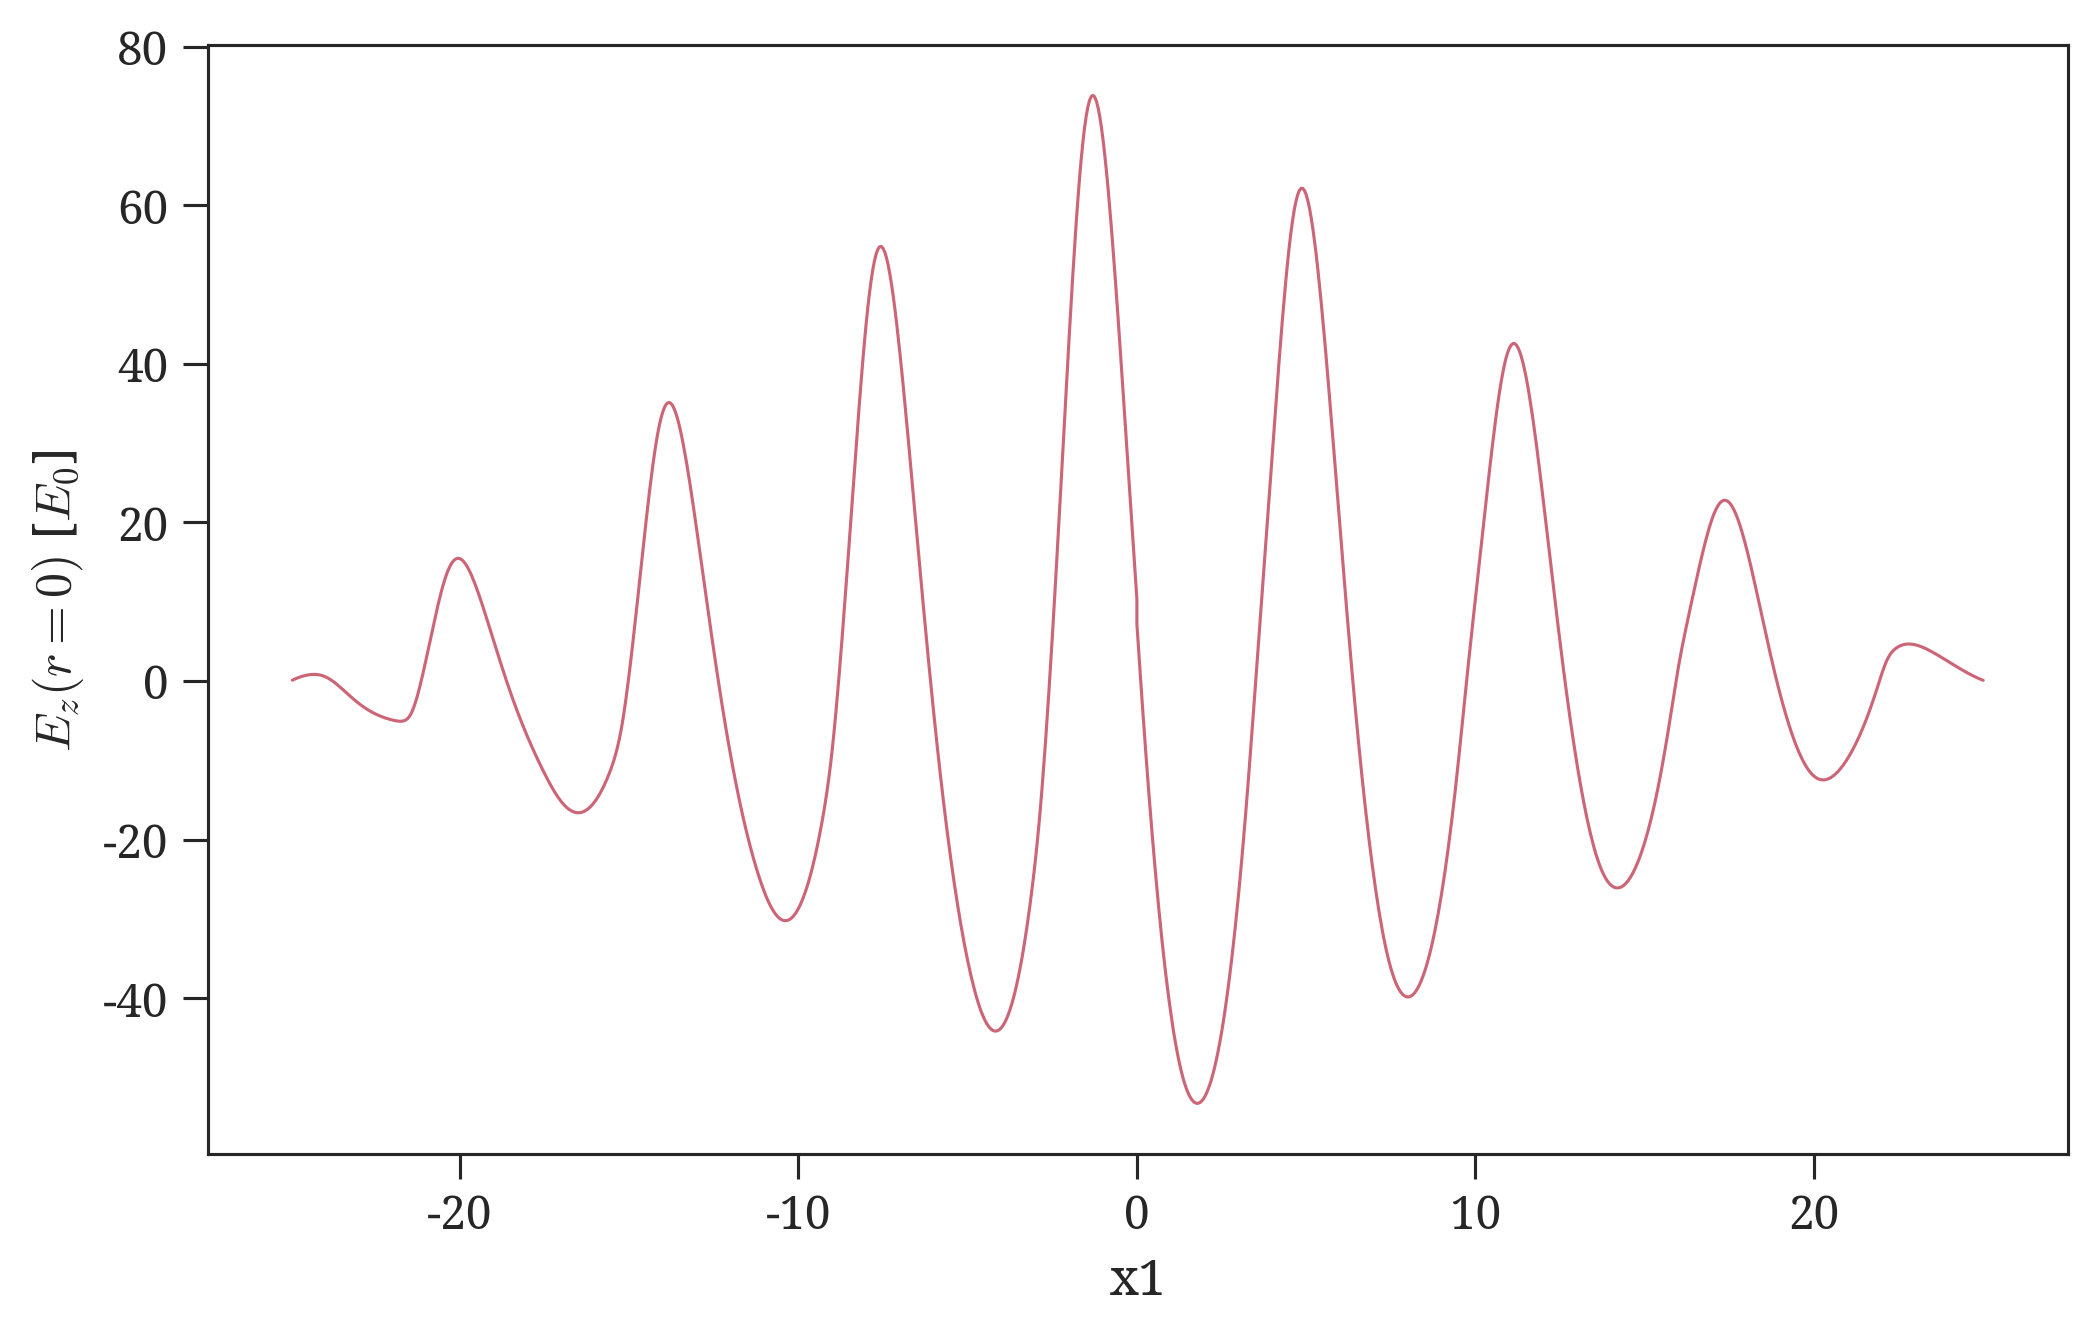

In [134]:

# corr = np.correlate(ds_sample.isel(t=31).plot(), ds_sample.isel(t=30).plot(), mode="full")

corr = xr.apply_ufunc(np.correlate, ds_sample.isel(t=40), ds_sample.isel(t=30), vectorize=True, kwargs=dict(mode='full'), dask='allowed', input_core_dims=[['x1'],['x1']], exclude_dims={'x1'}, output_core_dims=[['x1']], output_dtypes=[float])

x1corr = np.concatenate((ds_sample.x1[1:].to_numpy()+150, np.flip(-(ds_sample.x1.to_numpy()+150))))

corr = corr.assign_coords(x1=x1corr)

corr.plot()
# plt.xlim(-1,1)
# plt.ylim(70,90)

max(corr)

150.05

In [111]:
0.75/0.05

15.0